# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# As referenced to PLant Seedling Classification by Bryce M on Kaggle (@bmag8923)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, SpatialDropout2D
from tensorflow.keras.optimizers import Adam, SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
import random


# Ignore warnings
import warnings

warnings.filterwarnings('ignore')


## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loads the image file of the dataset
images = np.load('/content/drive/MyDrive/images.npy', allow_pickle=True)

# Loads the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
# Prints the shape of the image file and labels file
print(f'Shape of the image file: {images.shape}')
print(f'Shape of the labels file: {labels.shape}')

Shape of the image file: (4750, 128, 128, 3)
Shape of the labels file: (4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
# As referenced to Money Species Classification provided by Great Learning and University of Texas at Austin
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

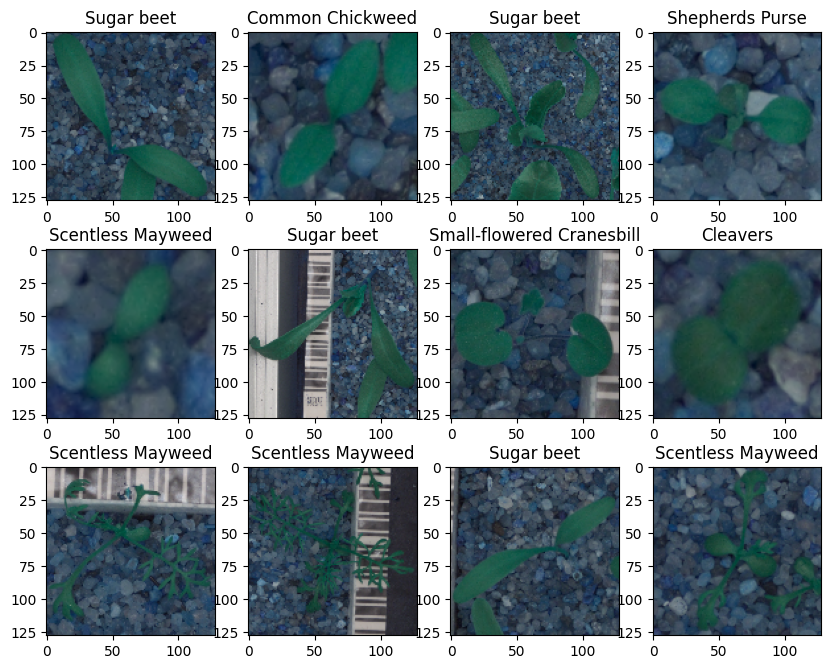

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Plots images and labels
plot_images(images,labels)

* Each plant seedling varies in size and shape.
* Some plants have longer stem and smaller leaves.
* The Small-flowered Cranesbill has a distinct leaf shape, which can be used for classification analysis model.

### Checks for Data Imbalance

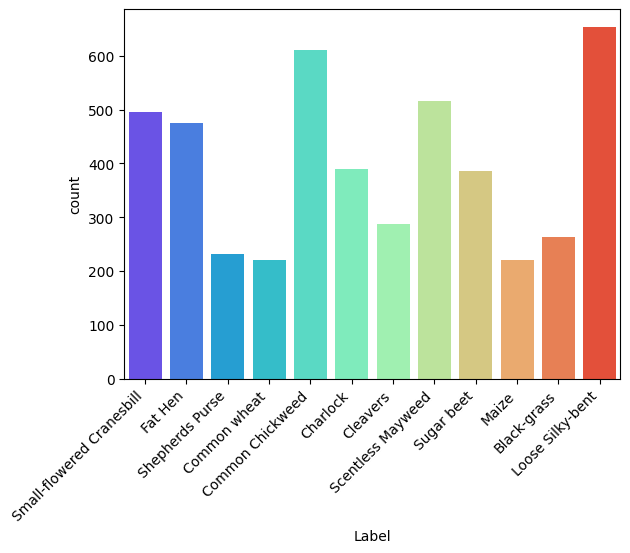

In [ ]:
# As referenced to PLant Seedling Classification by Bryce H on Kaggle (@bmag8923)
# Assuming 'labels' is a DataFrame and 'Label' is the column you are working with
sns.countplot(x=labels['Label'], palette='rainbow')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

* Common wheat, Maize, Black-grass and Sheperds Purse has a lower frequency than rest of the images.
* Therefore, there is data imbalance.

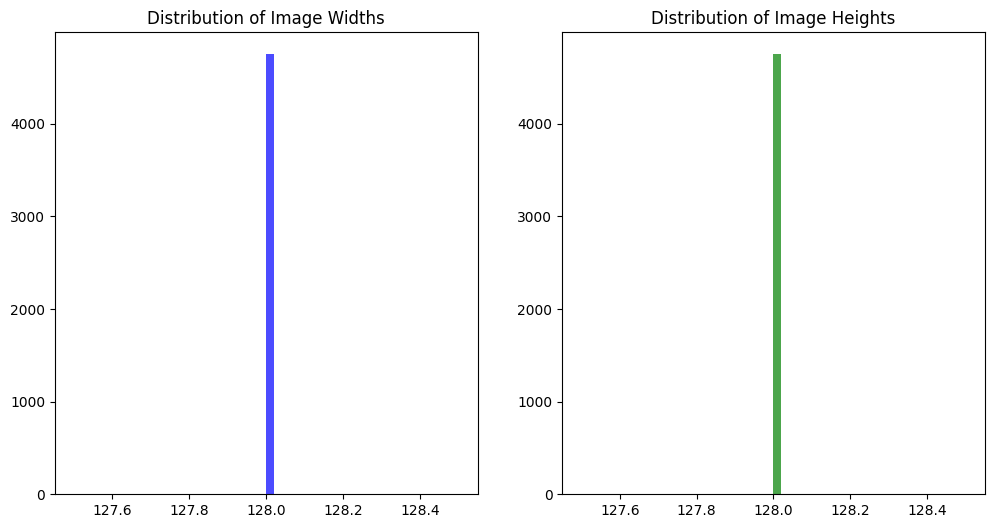

In [ ]:
# As referenced to PLant Seedling Classification by Bryce M on Kaggle (@bmag8923)
# Checks the distribution of image widths and heights
img_widths, img_heights = [], []

for img in images:
    h, w, _ = img.shape
    img_widths.append(w)
    img_heights.append(h)

# Plot distribution of widths and heights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(img_widths, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Image Widths")
plt.subplot(1, 2, 2)
plt.hist(img_heights, bins=50, color='green', alpha=0.7)
plt.title("Distribution of Image Heights")
plt.show()

* The distribution of image width and height is the same for all images.

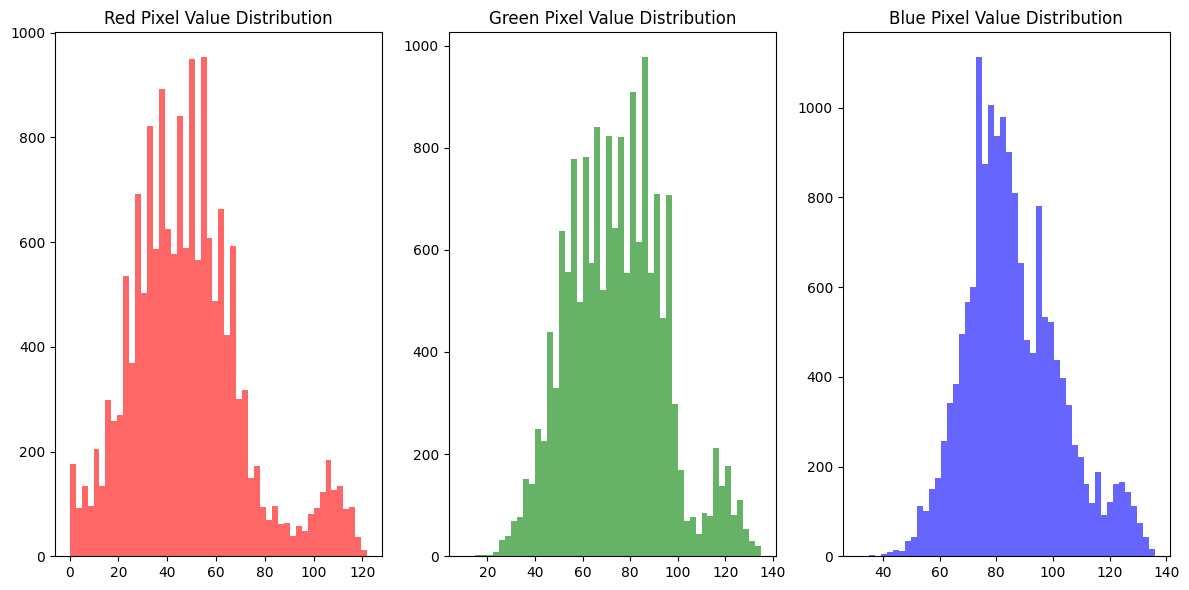

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M (bmag8923)
# Randomly select an image from the 'images' array
random_img = images[np.random.randint(0, len(images))]

# Create a figure with a larger size (12x6 inches)
plt.figure(figsize=(12, 6))

# Define a list of colors for the RGB channels
colors = ['Red', 'Green', 'Blue']

# Loop through each color channel (Red, Green, Blue) and create a histogram
for i, color in enumerate(colors):
    # Create a subplot for each color channel (3 subplots in total)
    plt.subplot(1, 3, i + 1)

    # For each color channel, extract pixel values and create a histogram
    # 'random_img[:, :, i]' extracts all pixel values for the ith color channel
    # '.ravel()' flattens the 2D array of pixel values into a 1D array
    plt.hist(random_img[:, :, i].ravel(), bins=50, color=color.lower(), alpha=0.6)

    # Set the title of each subplot indicating the color channel
    plt.title(f"{color} Pixel Value Distribution")

# Automatically adjust subplot layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

* The pixel distribution is consistent. Therefore, no pre-processing is required on color channels.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M on Kaggle (@bmag8923)
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Complete the code to convert the images from BGR to RGB

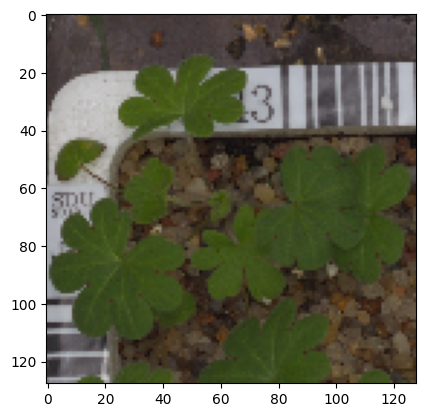

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
plt.imshow(images[3])

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# As referenced to Plant Seedling Classification by Bryce M on Kaggle (@bmag8923)
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

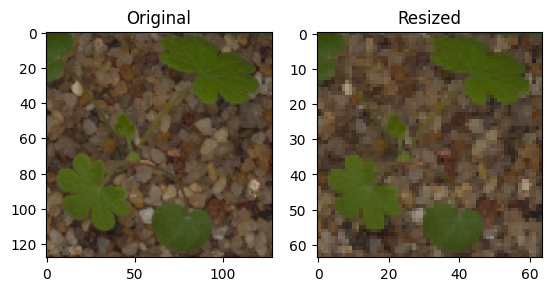

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M on Kaggle (@bmag8923)
count = 2
Titles = ["Original", "Resized"]
image = [images[52], images_decreased[52]]
for i in range(count):
    plt.subplot(1, count, i + 1)
    plt.title(Titles[i])
    plt.imshow(image[i])

plt.show()

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# As referenced to Plant Seedling Classification by Bryce M on Kaggle (@bmag8923)
# Splits the dataset into training, validation and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Convert labels from names to one hot vectors using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Check the shape of the encoded labels
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# As referenced to Plant Seedling Classification by Bryce M (bmag8923)
# Initialize a Sequential model
model1 = Sequential()

# Add first convolutional layer with 128 filters, 3x3 kernel, ReLU activation, and same padding
# Input shape is (64, 64, 3) representing the image size (64x64 pixels with 3 color channels)
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add first max pooling layer to reduce spatial dimensions (2x2 pool size)
model1.add(MaxPooling2D((2, 2), padding='same'))

# Add second convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Add second max pooling layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Add third convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Add third max pooling layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the 3D feature map to a 1D vector for fully connected layers
model1.add(Flatten())

# Add fully connected (dense) layer with 16 units and ReLU activation
model1.add(Dense(16, activation='relu'))

# Add Dropout layer to prevent overfitting (30% of neurons are randomly dropped)
model1.add(Dropout(0.3))

# Add output layer with 12 units (one for each class) and softmax activation for multi-class classification
model1.add(Dense(12, activation='softmax'))

# Use Adam optimizer for efficient training
opt = Adam()

# Compile the model with categorical crossentropy loss and accuracy as the evaluation metric
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          32,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,828 (503.23 KB)

 Trainable params: 128,828 (503.23 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model on the training data

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M (bmag8923)
# Fit the model on training data for 100 epochs
fit_model_1 = lambda model_1, x, y, validation_data, epochs: model_1.fit(
    x, y, validation_data=validation_data, epochs=epochs)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
history_1 = model1.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
121/121 - 11s - 93ms/step - accuracy: 0.1191 - loss: 2.4702 - val_accuracy: 0.1379 - val_loss: 2.4538
Epoch 2/30
121/121 - 1s - 9ms/step - accuracy: 0.1801 - loss: 2.3413 - val_accuracy: 0.3178 - val_loss: 2.1086
Epoch 3/30
121/121 - 1s - 9ms/step - accuracy: 0.2805 - loss: 2.0729 - val_accuracy: 0.3388 - val_loss: 1.8747
Epoch 4/30
121/121 - 1s - 11ms/step - accuracy: 0.3083 - loss: 1.9074 - val_accuracy: 0.3995 - val_loss: 1.7221
Epoch 5/30
121/121 - 1s - 10ms/step - accuracy: 0.3429 - loss: 1.8188 - val_accuracy: 0.4626 - val_loss: 1.5794
Epoch 6/30
121/121 - 1s - 10ms/step - accuracy: 0.3777 - loss: 1.7132 - val_accuracy: 0.4813 - val_loss: 1.5657
Epoch 7/30
121/121 - 1s - 9ms/step - accuracy: 0.4006 - loss: 1.6458 - val_accuracy: 0.5491 - val_loss: 1.4575
Epoch 8/30
121/121 - 1s - 9ms/step - accuracy: 0.4156 - loss: 1.6196 - val_accuracy: 0.5701 - val_loss: 1.2996
Epoch 9/30
121/121 - 1s - 11ms/step - accuracy: 0.4328 - loss: 1.5406 - val_accuracy: 0.5467 - val_loss: 1.

### Model Evaluation

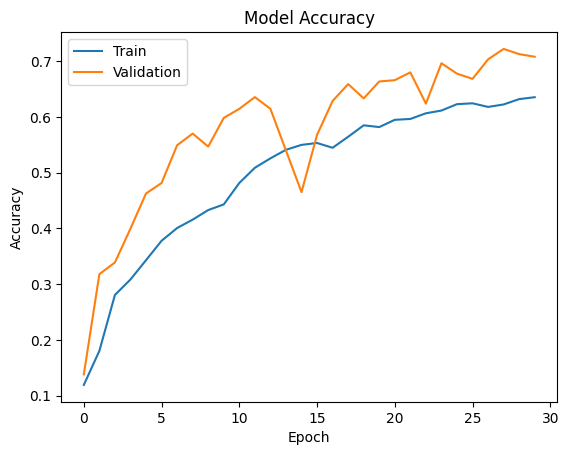

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* Training accuracy increases over each epoch.
* There is a sharp drop in validation accuracy at 15 epochs.

### Evaluating the model on test data

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
accuracy1 = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 60ms/step - accuracy: 0.7053 - loss: 0.9460


### Generating the predictions using test data

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Here we would get the output as probablities for each category
y_pred1=model1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
y_pred1

array([[3.9136787e-13, 6.1803618e-18, 5.8745134e-16, ..., 5.1645995e-03,
        2.8540080e-12, 7.0671863e-03],
       [1.2390650e-10, 1.5644062e-01, 3.1786032e-05, ..., 2.7767353e-02,
        8.1344628e-01, 1.1008540e-03],
       [4.4758401e-09, 1.4392342e-02, 5.0372851e-06, ..., 1.1906284e-02,
        9.7008342e-01, 1.1059297e-03],
       ...,
       [1.8588130e-01, 4.0220676e-09, 1.5436222e-05, ..., 6.9259855e-08,
        1.4831305e-06, 1.5396894e-05],
       [8.8038362e-08, 9.2688549e-07, 2.0483223e-05, ..., 1.1251424e-01,
        3.1561385e-07, 1.5119934e-03],
       [1.6960274e-07, 2.9722385e-05, 1.0287614e-05, ..., 6.8512291e-01,
        1.4772567e-03, 9.4458386e-02]], dtype=float32)

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M (bmag8923)
# Evaluate the model on X_test and y_test
results = model1.evaluate(X_test_normalized, y_test_encoded)
print(f"Test loss: {results[0]}")
print(f"Test accuracy: {results[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7245 - loss: 0.8692
Test loss: 0.945979654788971
Test accuracy: 0.7052631378173828


### Plotting the confusion matrix

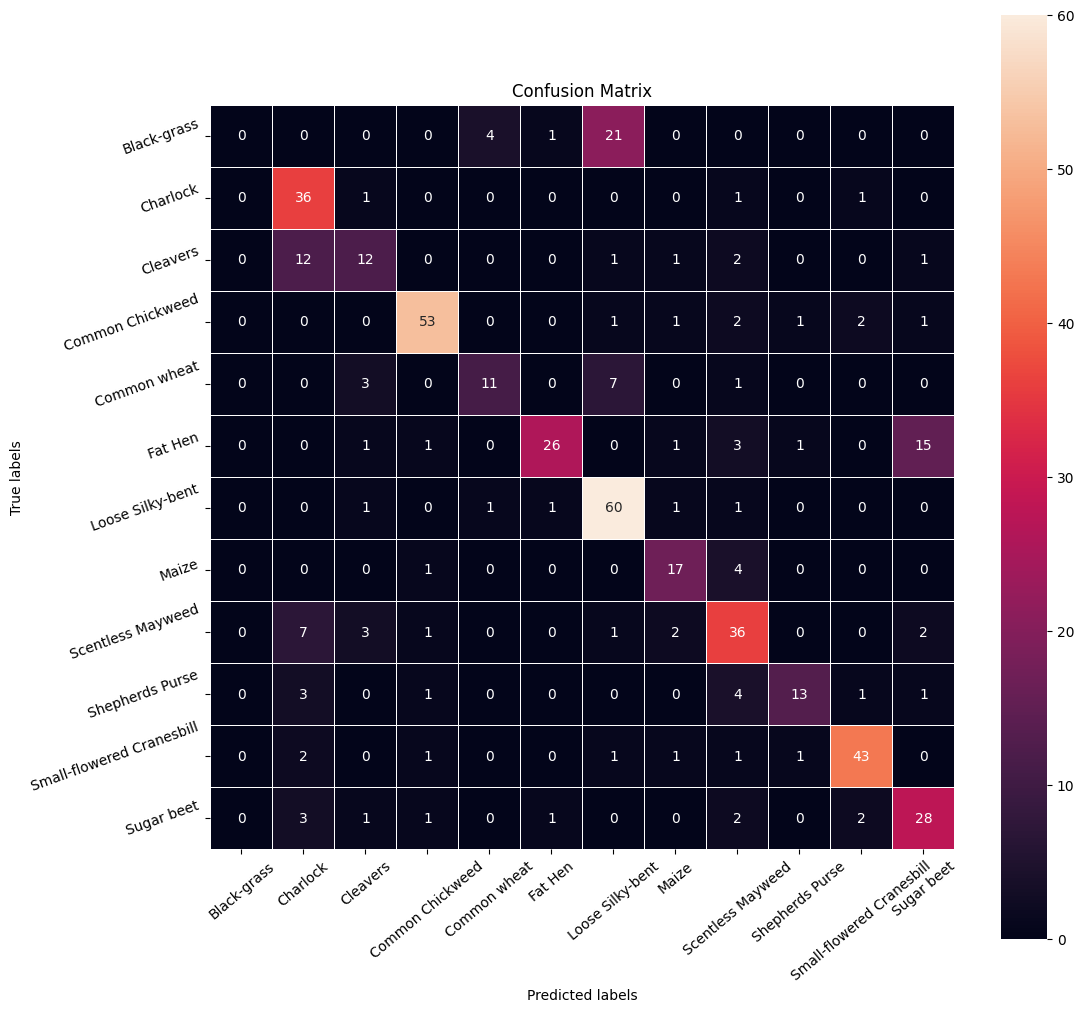

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred1, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M (bmag8923)
# Printing the classification report
cr1 = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.57      0.92      0.71        39
           2       0.55      0.41      0.47        29
           3       0.90      0.87      0.88        61
           4       0.69      0.50      0.58        22
           5       0.90      0.54      0.68        48
           6       0.65      0.92      0.76        65
           7       0.71      0.77      0.74        22
           8       0.63      0.69      0.66        52
           9       0.81      0.57      0.67        23
          10       0.88      0.86      0.87        50
          11       0.58      0.74      0.65        38

    accuracy                           0.71       475
   macro avg       0.66      0.65      0.64       475
weighted avg       0.69      0.71      0.68       475



* The model performance is not as good as expected due to data imbalance
* The weighted average for recall and precision is relatively the same

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M  on Kaggle (@bmag8923)
# Code to monitor val_accuracy
Learning_Rate_Reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# All images to be rescaled by 1/255.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Intializing a sequential model - model 2
model2 = Sequential()

# Input_shape denotes input image dimension images
model2.add(
    Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal', input_shape=(64, 64, 3))
)
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Dropout(0.3))

model2.add(Conv2D(256, (5, 5), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Dropout(0.4))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(SpatialDropout2D(0.3))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

model2.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(12, activation='softmax'))

opt = Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │          73,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d (SpatialDropout2D) │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │              

 Total params: 1,381,900 (5.27 MB)

 Trainable params: 1,380,556 (5.27 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Fit the model on training data for 120 epochs
# Epochs
epochs = 120
# Batch size
batch_size = 32

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

#| code-summary: Fit the model on training data for 100 epochs
#| output: false

fit_model_2 = lambda model_2, x, y, validation_data, epochs: model_2.fit(
    train_datagen.flow(x, y, batch_size=batch_size, shuffle=False),
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    callbacks=[Learning_Rate_Reduction, early_stopping],
    validation_data=validation_data,
    epochs=epochs,
)

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
history_2 = model2.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
121/121 - 32s - 263ms/step - accuracy: 0.2233 - loss: 4.4055 - val_accuracy: 0.1379 - val_loss: 6.3015
Epoch 2/30
121/121 - 5s - 42ms/step - accuracy: 0.4380 - loss: 3.0358 - val_accuracy: 0.1916 - val_loss: 4.3989
Epoch 3/30
121/121 - 5s - 41ms/step - accuracy: 0.5360 - loss: 2.3556 - val_accuracy: 0.2056 - val_loss: 3.8338
Epoch 4/30
121/121 - 5s - 43ms/step - accuracy: 0.6041 - loss: 1.9638 - val_accuracy: 0.6285 - val_loss: 1.8754
Epoch 5/30
121/121 - 5s - 42ms/step - accuracy: 0.6730 - loss: 1.6124 - val_accuracy: 0.7687 - val_loss: 1.2980
Epoch 6/30
121/121 - 5s - 42ms/step - accuracy: 0.7034 - loss: 1.4287 - val_accuracy: 0.7967 - val_loss: 1.2116
Epoch 7/30
121/121 - 5s - 43ms/step - accuracy: 0.7206 - loss: 1.3297 - val_accuracy: 0.7477 - val_loss: 1.2803
Epoch 8/30
121/121 - 5s - 40ms/step - accuracy: 0.7564 - loss: 1.1885 - val_accuracy: 0.7150 - val_loss: 1.2594
Epoch 9/30
121/121 - 5s - 43ms/step - accuracy: 0.7606 - loss: 1.1467 - val_accuracy: 0.6519 - val_los

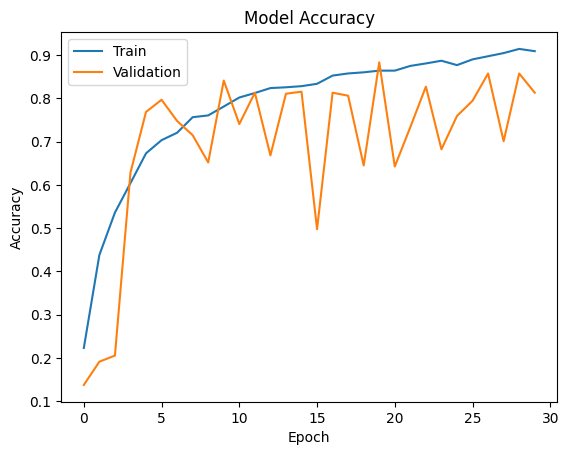

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* Training accuracy increased over each epoch.
* Validation accuracy had sharp drops.

In [ ]:
# As referenced to Plant Seedling Classification by Bryce M on Kaggle (@bmag8923)
# Evaluate the model on X_test and y_test
results = model2.evaluate(X_test_normalized, y_test_encoded)
print(f"Test loss: {results[0]}")
print(f"Test accuracy: {results[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.8152 - loss: 0.8998
Test loss: 0.8914074897766113
Test accuracy: 0.8231579065322876


In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
accuracy2 = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 14ms/step - accuracy: 0.8232 - loss: 0.8914


In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Get the output as probablities for each category
y_pred2=model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


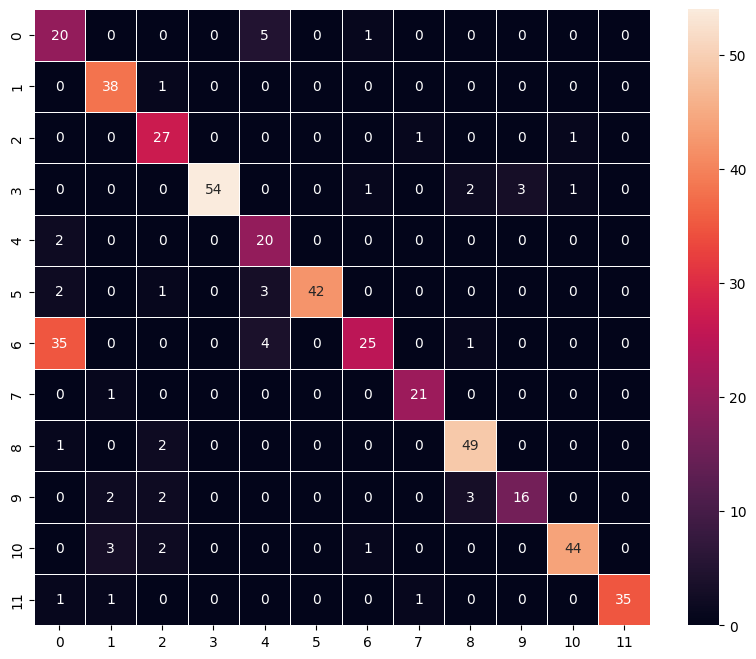

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
# Plotting the classification report
cr2 = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr2)

              precision    recall  f1-score   support

           0       0.33      0.77      0.46        26
           1       0.84      0.97      0.90        39
           2       0.77      0.93      0.84        29
           3       1.00      0.89      0.94        61
           4       0.62      0.91      0.74        22
           5       1.00      0.88      0.93        48
           6       0.89      0.38      0.54        65
           7       0.91      0.95      0.93        22
           8       0.89      0.94      0.92        52
           9       0.84      0.70      0.76        23
          10       0.96      0.88      0.92        50
          11       1.00      0.92      0.96        38

    accuracy                           0.82       475
   macro avg       0.84      0.84      0.82       475
weighted avg       0.88      0.82      0.83       475



* After reducing the learning rate and implementing data augmentation, the model performance improved significantly.
* The weighted average F1 score is 0.82, which is indicative of good model performance.
* The model also has a high precision and recall score compared to the CNN model created previously.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [ ]:
# As referenced to Monkey Species Classification provided by Great Learning and University of Texas at Austin
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation'],
              'Train Accuracy':['63.53%','90.90%'],
              'Validation Accuracy':['70.79%','81.31%'],
              'Test Accuracy':['70.53%','81.52%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,63.53%,70.79%,70.53%
1,CNN Model with Data Augmentation,90.90%,81.31%,81.52%


Model 2 was selected due to its high accuracy on testing set. High accuracy on test set is essential for classification analysis. It also has a high accuracy on training and validation set.

### Visualizing the prediction

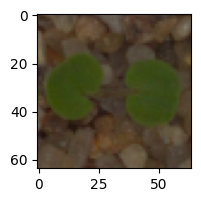

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


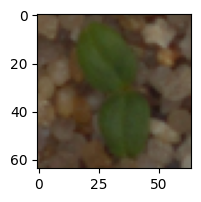

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label ['Cleavers']
True Label Cleavers


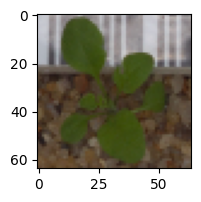

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Actionable Insights and Business Recommendations

* This model utilizes plant seedlings classification using CNN which is an amalgamation of technology and ecology, a path for a greener and more informed future.
* Even though the accuracy is roughly 81.52% on test data, the model can be substantially reduce the time and effort required for identification of these plants, resulting in reducing human resources.
* This model can be improved by application of additional data.
* By incorporating automatic weeding systems, the amount of pesticides used could be reduced considerably resulting in more eco-friendly farming.
* Identifying the unknown plant from a photograph could be made possible by building a mobile application for the farmer to make a quick decision.

______